In [22]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions as decode_predictions_vgg16
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
# import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
def show_image(img):
    plt.imshow(img)
    plt.show()

def transform_img_inception(img_path):
    # out = []
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = inc_net.preprocess_input(x)
      # out.append(x)
    return x

def transform_img_vgg16(img_path):
    # out = []
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
      # out.append(x)
    return x

In [45]:
images = transform_img_inception('/content/golden-retriever-royalty-free-image-506756303-1560962726.jpeg')

('n02099601', 'golden_retriever', 0.9588112)
('n04409515', 'tennis_ball', 0.0041855574)
('n02099712', 'Labrador_retriever', 0.0018754868)
('n02100877', 'Irish_setter', 0.0009020096)
('n02101388', 'Brittany_spaniel', 0.00086400635)


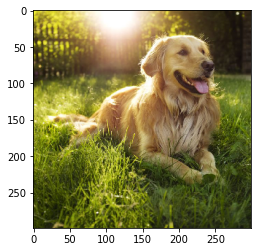

In [46]:
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
inet_model = inc_net.InceptionV3()
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [19]:
images = transform_img_vgg16('/content/golden-retriever-royalty-free-image-506756303-1560962726.jpeg')

In [32]:
model = VGG16()
# for i in range(9,20):
#   k = i/10
#   plt.title(k)
#   show_image(images[0] / 2 + k)
preds = model.predict(images)
for x in decode_predictions_vgg16(preds)[0]:
    print(x)

('n02099601', 'golden_retriever', 0.84775984)
('n02101556', 'clumber', 0.051157527)
('n02102480', 'Sussex_spaniel', 0.048460107)
('n02099712', 'Labrador_retriever', 0.014150657)
('n02100583', 'vizsla', 0.011776042)


In [35]:
%load_ext autoreload
%autoreload 2
!pip3 install lime
import os,sys
import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 8.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=55f6c5ab762c5c2511ca2fcff99341a4d0b84ca55c2ebcd65546233be995f34c
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [36]:
explainer = lime_image.LimeImageExplainer()

In [47]:
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
# explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=10)
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [40]:
from skimage.segmentation import mark_boundaries

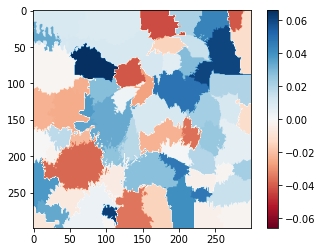

In [48]:
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

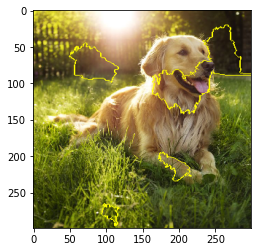

In [49]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

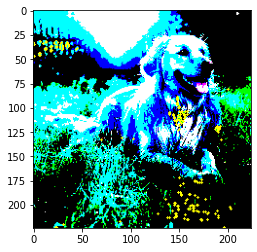

In [44]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))